# Exploring Transit Timing Variations Using the River Plot

### Import `lightkurve`, `astropy`, and retrieve relevant data

In [81]:
import lightkurve as lk
import numpy as np
from matplotlib import pyplot as plt
import astropy as ap
import astropy.units as u

# Find and download all data for KIC 6185476 from Kepler with a long exptime
data = lk.search_lightcurve("KIC 6185476", author="Kepler", exptime=1800).download_all()

### Clean Data: Detrend, Normalize, and remove NaNs

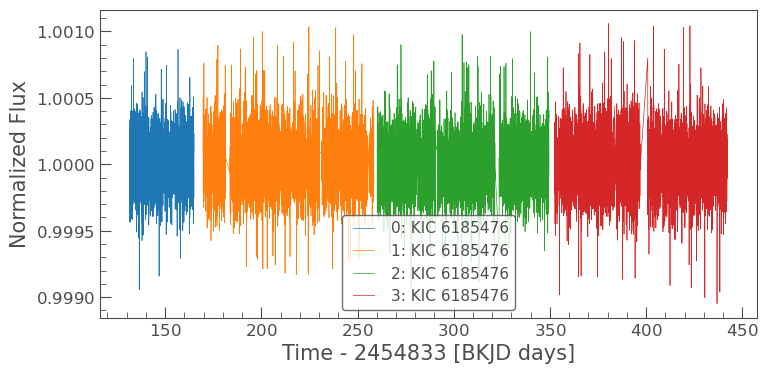

In [ ]:
# Normalize and remove outliers from each lightcurve individually before appending
for index, light_curves in enumerate(data):
    # It may take some trial and error to find the right window size
    data[index] = data[index].flatten(window_length=401).remove_nans()
    data[index] = data[index].remove_outliers()

# Stitch and plot the lightcurves
lc = data.stitch()
lc.plot()
plt.show()

### Use NEA data to create the Phase Folded Light Curve

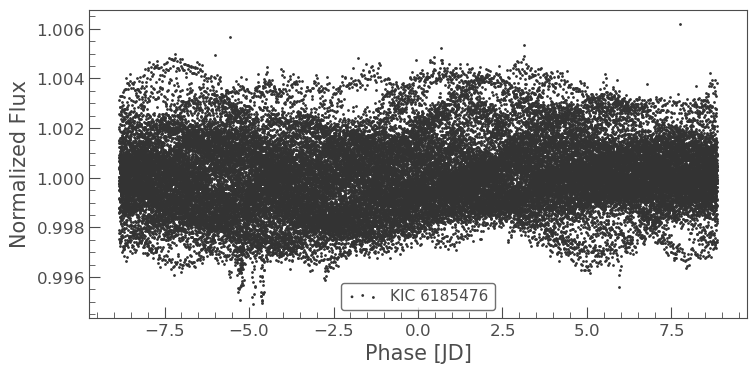

In [ ]:
folded_data = lc.fold(period=17.68899400, epoch_time=0)
folded_data.scatter()
plt.show()
# Hmmm, even though we know the period is 17.68899400 days, 
# the folded lightcurve doesn't look right. 
# What if we try a different kind of plot?

### Create the river plot for the system

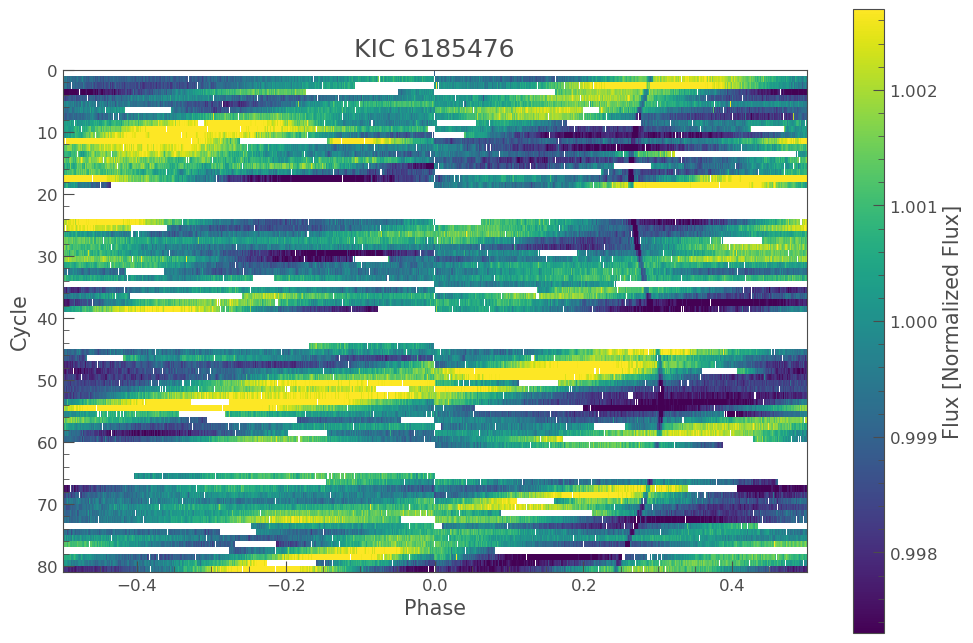

In [ ]:
lc.plot_river(period=17.68899400)
plt.show()

# Interesting! That dark band on the right side is the transit of the planet.
# You can see how it meanders back and forth through the phase of the transit,
# which is why the folded lightcurve didn't look right. 